## 🔍 **DBSCAN Algorithm Summary**

### 📌 **What is DBSCAN?**  
DBSCAN (**Density-Based Spatial Clustering of Applications with Noise**) is a **density-based** clustering algorithm that efficiently detects clusters of arbitrary shapes and handles noise effectively.  

---

### 🛠 **How the Algorithm Works:**

1️⃣ **Define Key Parameters:**  
   - `eps` (**Neighborhood Radius**) → Defines the maximum distance within which points are considered neighbors.  
   - `min_samples` (**Minimum Points**) → Specifies the minimum number of points required to form a cluster.

2️⃣ **Select a Random Point and Check its Neighbors:**  
   - If the number of neighbors **≥ `min_samples`**, the point is a **Core Point**, and a cluster begins forming.  
   - If the number of neighbors **< `min_samples`**, the point is classified as a **Border Point** or **Noise**.

3️⃣ **Expand the Cluster:**  
   - All neighbors within `eps` are added to the same cluster.  
   - The process is repeated for newly added points until no more points can be added.

4️⃣ **Repeat the Process:**  
   - Identify new unclassified core points and form additional clusters.  
   - Some points remain classified as **Noise (-1)** if they do not belong to any cluster.

---

### **DBSCAN: Advantages & Disadvantages**

#### 🎯 **Advantages**
- ✅ **No need to specify clusters**: Unlike K-Means, DBSCAN determines clusters automatically.
- ✅ **Detects irregular cluster shapes**: Works well with non-spherical structures.
- ✅ **Handles noise effectively**: Can separate outliers from meaningful clusters.
- ✅ **Scales well for large datasets**: Optimized implementations like KD-Trees improve efficiency.
- ✅ **Relies on local density**: Can identify clusters of varying sizes.

#### ❌ **Disadvantages**
- ❌ **Sensitive to parameters (`eps`, `MinPts`)**, affecting clustering quality.
- ❌ **Struggles with varying density clusters**, leading to incorrect segmentation.
- ❌ **Performs poorly in high-dimensional data** (distance calculations become unreliable).
- ❌ **No straightforward method for tuning parameters** (`eps`, `MinPts` require trial & error).
- ❌ **May fail to connect weakly linked clusters**, especially with sparse regions.

<br>

---


### 📌 **When to Use DBSCAN?**  
DBSCAN is ideal for situations where:  
🔹 The number of clusters is unknown and difficult to determine.  
🔹 The data contains clusters of **arbitrary shapes** (not necessarily spherical).  
🔹 There are **outliers** that should not be assigned to any cluster.  
🔹 The dataset has **low to moderate dimensions** (as DBSCAN struggles with high-dimensional data).  
🔹 The clusters have **relatively uniform density** (as DBSCAN may struggle with clusters of different densities).  

---

<br>

💡 **Conclusion:** DBSCAN is excellent for detecting irregular clusters and handling noise but requires **careful parameter tuning** for optimal results. 🚀

<br>

---

<br><br>


### 🔍 **DBSCAN Algorithm: Types & Assumptions**

#### **3️⃣ Types of Data DBSCAN Can Handle**
- **Continuous numerical data** (e.g., geospatial, image, and biometric data).  
- **2D or 3D data** (e.g., GIS data).  
- **High-dimensional data**, though performance degrades.  
- **Metric-space data** (e.g., Euclidean, Cosine distance).  

---

#### **4️⃣ DBSCAN Assumptions**
1. **Clusters Have Uniform Density**  
   - Works best when clusters have similar densities.

2. **Points Within a Cluster Are Close Together**  
   - Relies on a proper epsilon value to define cluster boundaries.

3. **Handles Noise Naturally**  
   - Assumes some points are noise and does not force all points into clusters.

4. **Performs Poorly with Mixed-Density Clusters**  
   - May struggle to detect clusters of different densities.

---

#### **5️⃣ Best Practices & Use Cases**
1. **Choosing the Best varepsilon**  
   - Use the **K-distance graph** to find the "elbow" point.

2. **Optimizing with Efficient Data Structures**  
   - Use **KD-Trees** or **Ball Trees** to reduce complexity from $$ \\ O(n^2) \\ to \\ O(n log n) \\ $$.

3. **Fraud & Anomaly Detection**  
   - Useful for identifying isolated fraudulent transactions.

4. **Handling High-Dimensional Data**  
   - Apply **PCA** before DBSCAN to improve clustering results.

5. **Selecting MinPts Value**  
   - A good rule of thumb: **$$\\( MinPts = 2 \times \text{number of dimensions} \\)$$**.

---

#### **6️⃣ Evaluating DBSCAN Performance**

##### **A. Cluster Quality Metrics**
1. **Davies-Bouldin Index (DBI)**
```python
   from sklearn.metrics import davies_bouldin_score
   davies_bouldin_score(X, labels)

```

2. **Silhouette Score**

3. **Calinski-Harabasz Index (CHI)**
```python
   from sklearn.metrics import calinski_harabasz_score
   calinski_harabasz_score(X, labels)

```
##### **B. Comparing Against Ground Truth Labels**

1. **Adjusted Rand Index (ARI)**
``` python
   from sklearn.metrics import adjusted_rand_score
   adjusted_rand_score(true_labels, predicted_labels)
```
2. **Homogeneity & Completeness**
``` python
   from sklearn.metrics import homogeneity_score, completeness_score
   homogeneity_score(true_labels, predicted_labels)
   completeness_score(true_labels, predicted_labels)
```
3. **Normalized Mutual Information (NMI)**
``` python
   from sklearn.metrics import normalized_mutual_info_score
   normalized_mutual_info_score(true_labels, predicted_labels)
```
##### **C. Performance Analysis**
1. **Execution Time Measurement**
``` python
import time
from sklearn.cluster import DBSCAN

start_time = time.time()
clustering = DBSCAN(eps=0.5, min_samples=5).fit(X)
end_time = time.time()

print(f"Execution Time: {end_time - start_time:.4f} seconds")
```
2. **Noise Ratio Calculation**
```python 
import numpy as np
noise_ratio = np.sum(labels == -1) / len(labels)
print(f"Noise Ratio: {noise_ratio:.2%}")
```

<br>

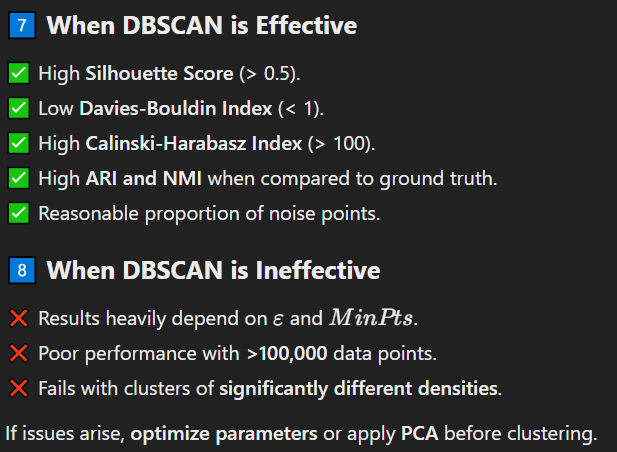

<br>

---

<br> <br>


## 🟤 Import Libraries 📚<br>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler , MinMaxScaler , StandardScaler
from scipy.stats import boxcox, yeojohnson
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA

<br>

## 🔵 Read Dataset 📊📥

To know more Information about Dataset that's the link of the Dataset in Kaggle : https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

In [3]:
df = pd.read_csv('CC GENERAL.csv')

<br>

## 🟣 Exploratory Data Analysis (EDA) 📈🔍

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8945    False
8946    False
8947    False
8948    False
8949    False
Length: 8950, dtype: bool

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


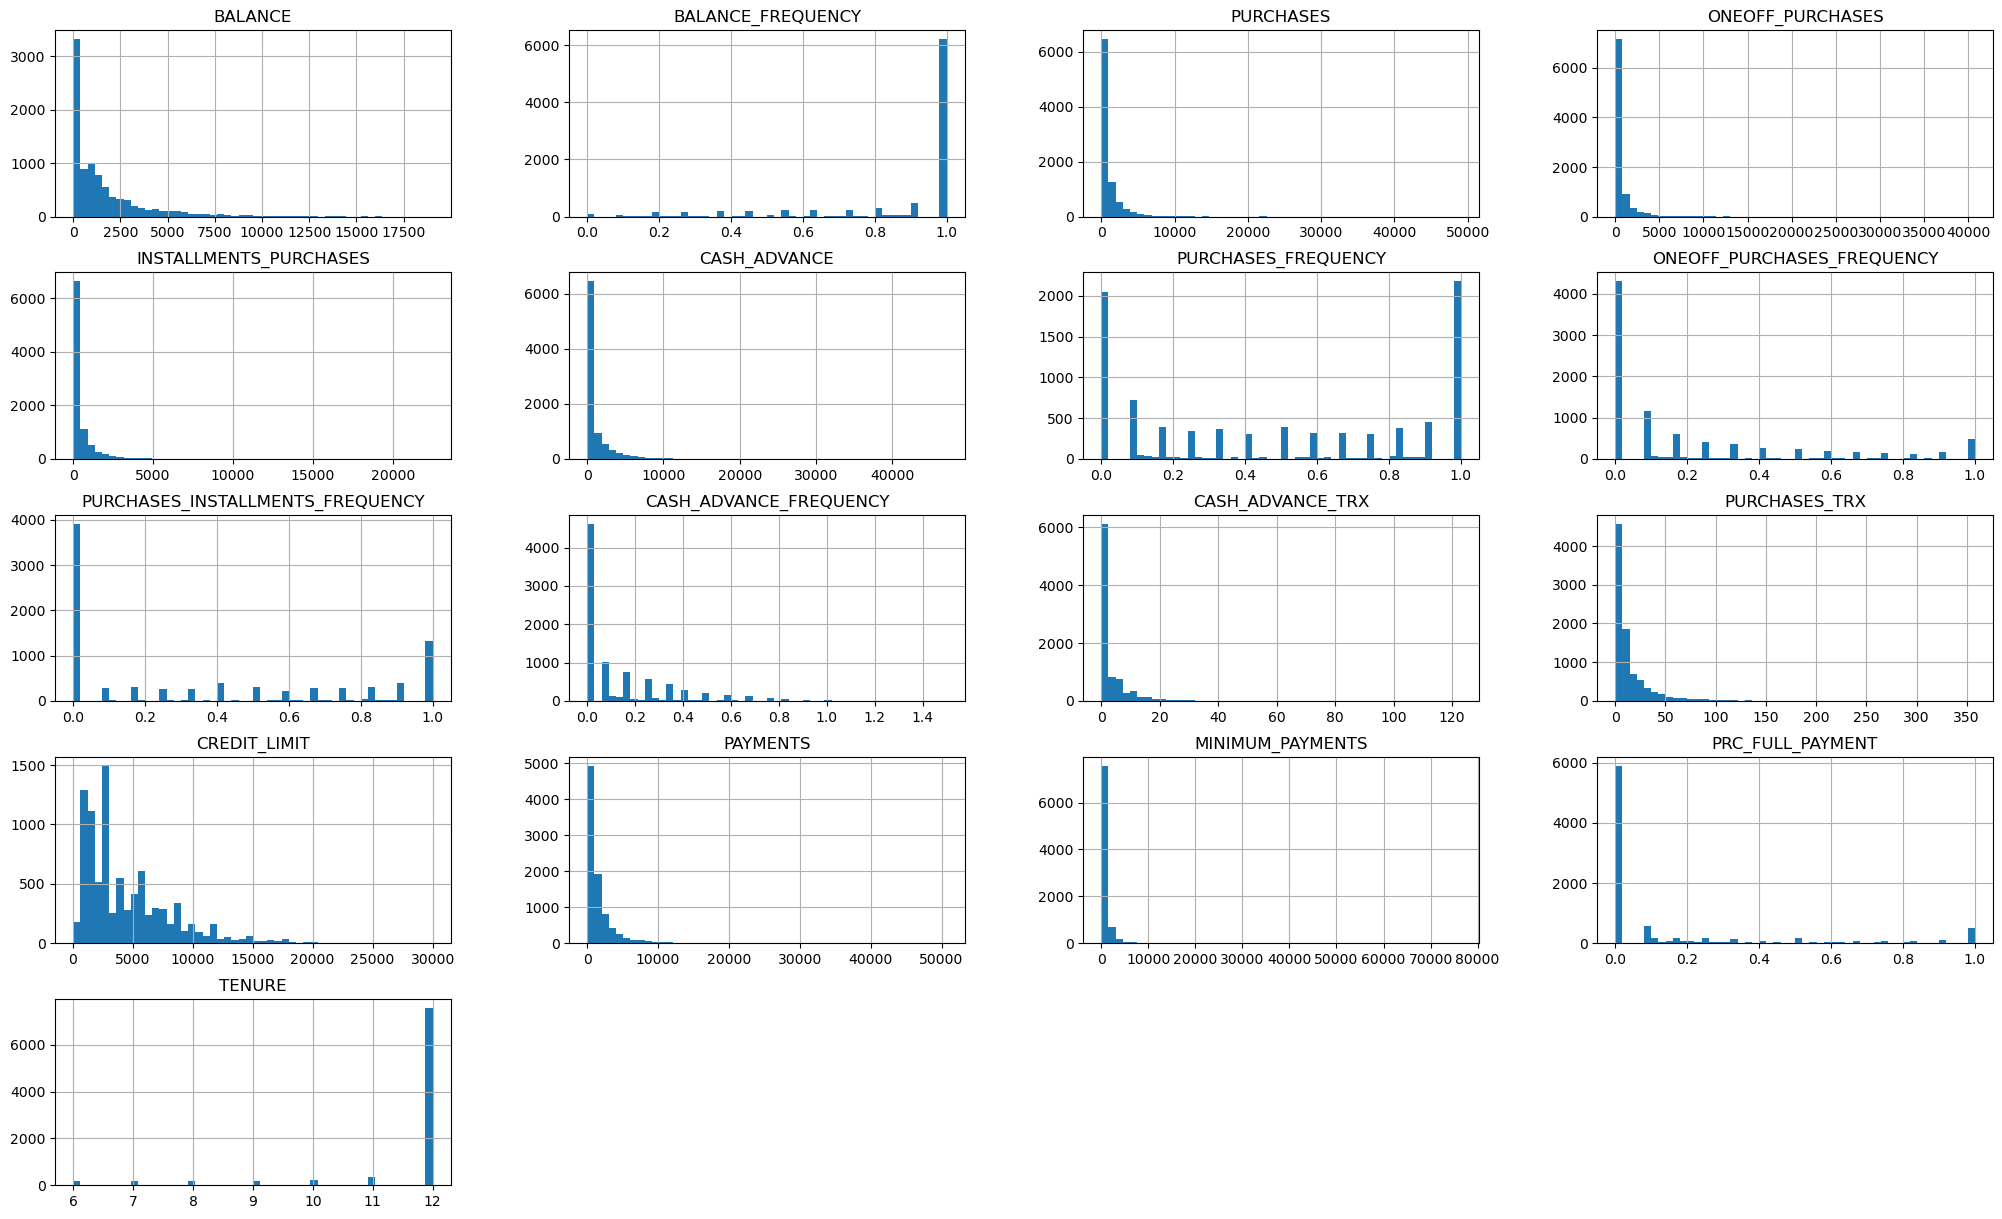

In [ ]:
df.hist(bins=50, figsize=(25,15))
plt.show()

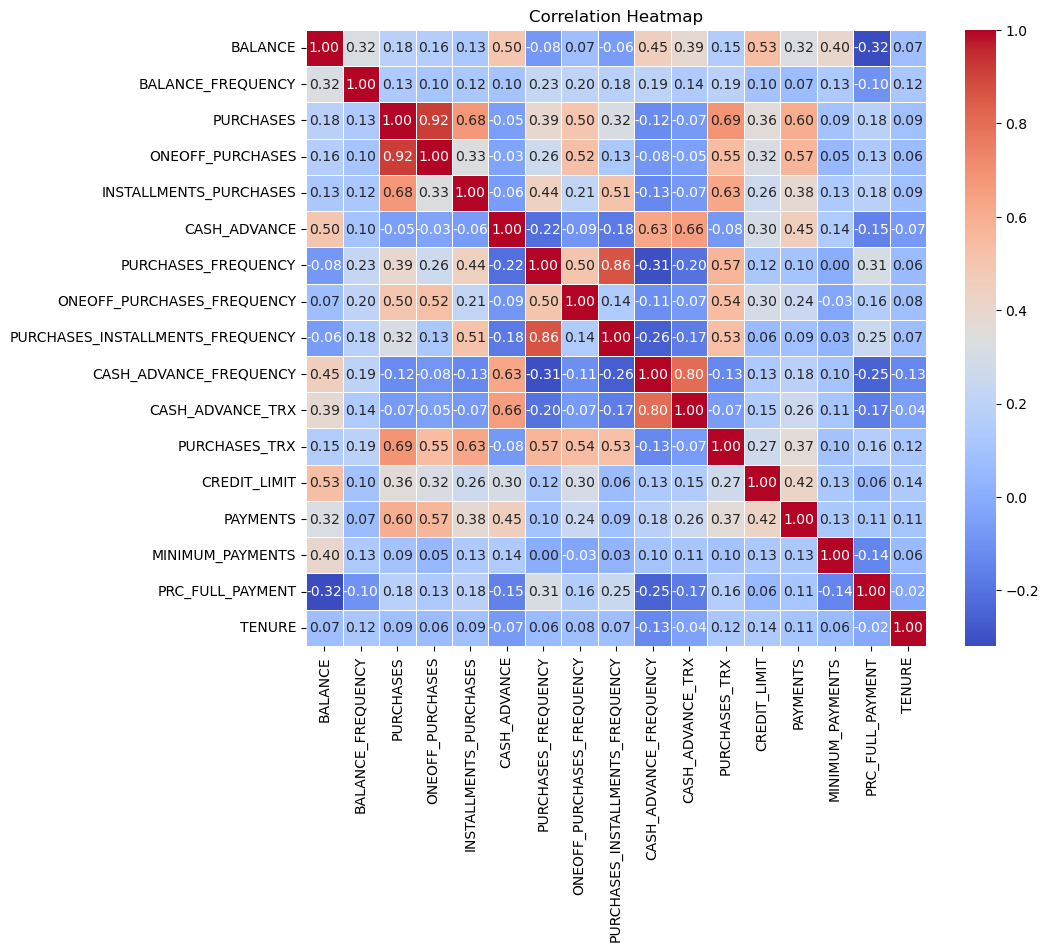

In [ ]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

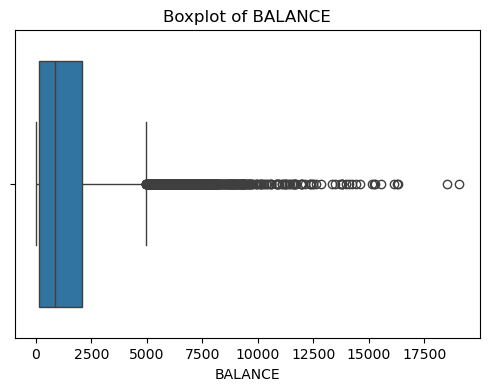

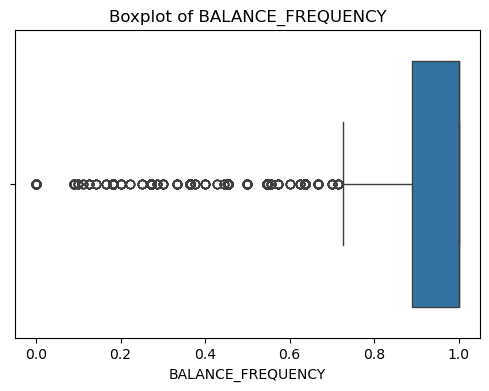

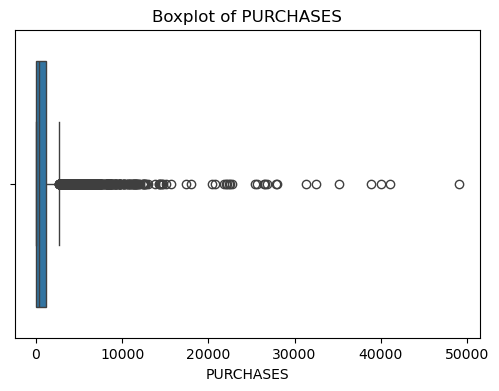

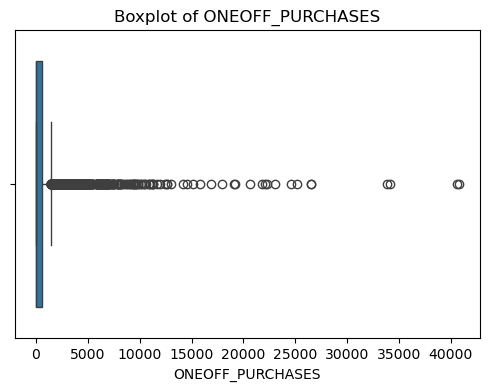

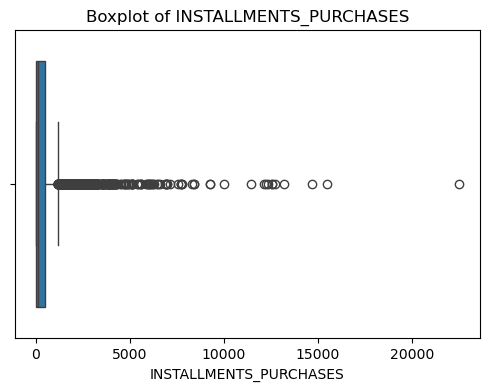

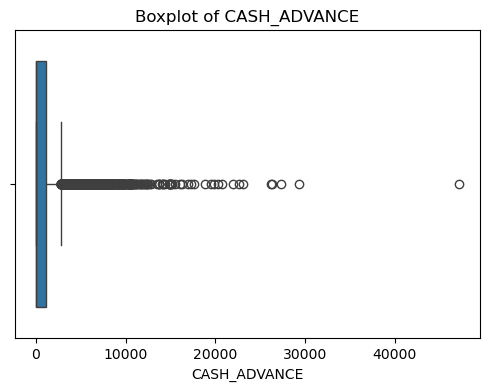

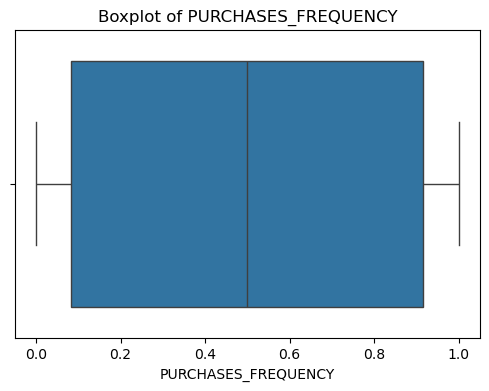

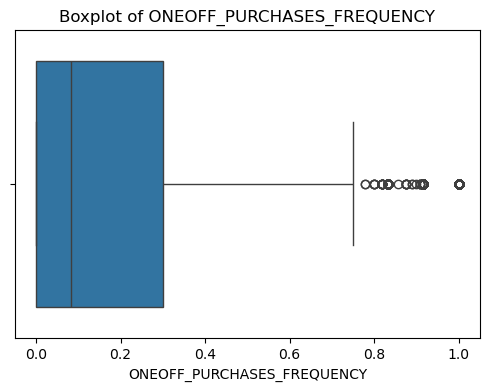

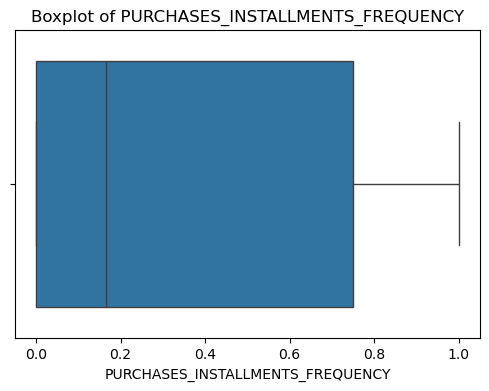

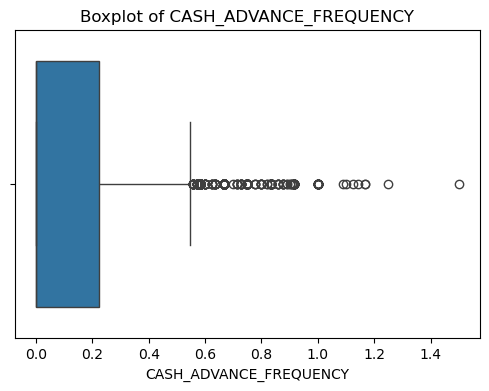

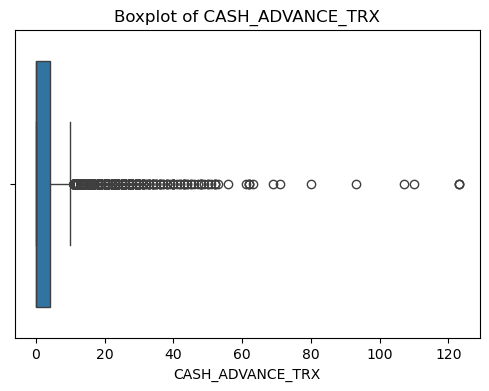

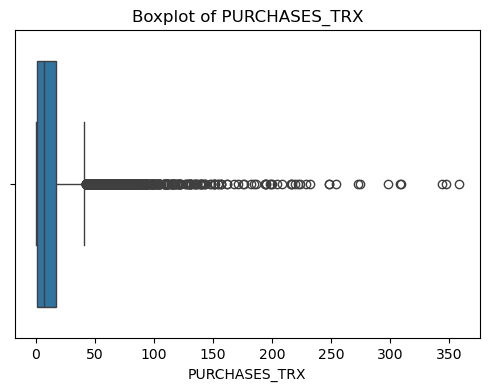

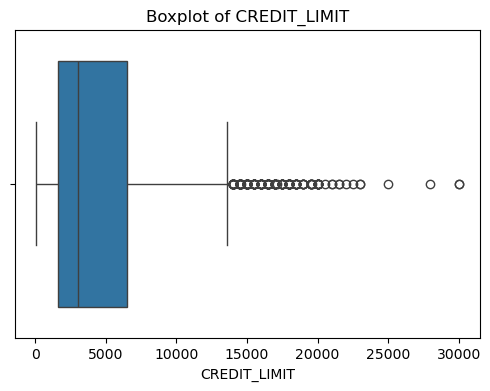

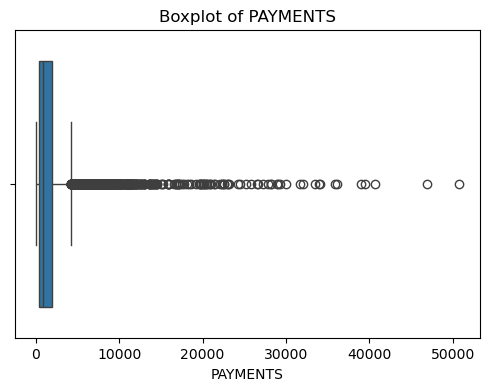

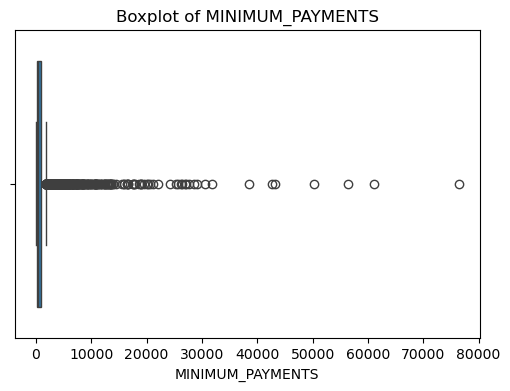

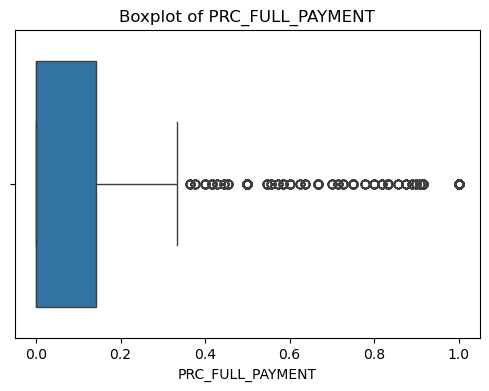

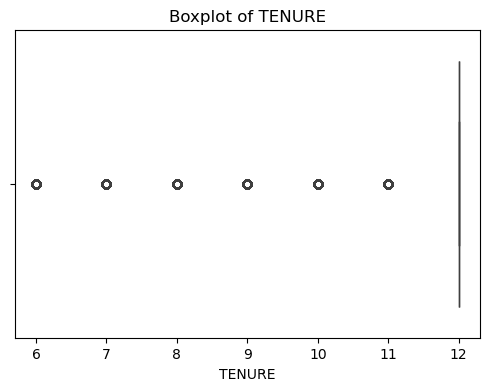

In [ ]:
numeric_columns = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_columns]

for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

<br>
<h3>  Fill Missing Data 📝➕<h3>

In [4]:
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())

<br>
<h3>Drop columns that are not necessary ❌📑<h3>

✅ PURCHASES: Because it represents the total spending.

✅ ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES: To know the payment preferences.

✅ PURCHASES_FREQUENCY and PURCHASESINSTALLMENTSFREQUENCY: To understand the purchasing pattern.

✅ CASH_ADVANCE and CASHADVANCEFREQUENCY: To identify customers who rely on cash withdrawal.

✅ CREDIT_LIMIT: Because it affects the customer's ability to spend.

✅ PAYMENTS and PRCFULLPAYMENT: To know the customer's ability to pay.

✅ BALANCE_FREQUENCY: Because it reflects the customer's follow-up of his balance.

❌ CUST_ID : Because it is an identifier and has nothing to do with the behavioral pattern.

❌ CASHADVANCETRX and PURCHASES_TRX : They may be less important compared to the monetary values ​​themselves.

❌ TENURE : Unless we care about the duration of the relationship with the bank in the analysis.The histogram shows that it is not very variable (very limited values), so it may not be of much use in analysis.

In [5]:
df.drop(columns=["CUST_ID" ,"TENURE" ], inplace=True)

<br>

## 🟡 Scaling the data ⚖️🔢

<br>
<h3>Dealing with outlier ⚠️📈<h3>

In [6]:
numeric_cols = df.select_dtypes(include=["float64"])

Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_mask = (numeric_cols < lower_bound) | (numeric_cols > upper_bound)

outlier_counts = outliers_mask.sum(axis=0)

total_rows = numeric_cols.shape[0]
outlier_percentage = (outlier_counts / total_rows) * 100

outliers_summary = pd.DataFrame({
    "Number of Outliers": outlier_counts,
    "Outlier Percentage": outlier_percentage
})

outliers_summary.style.background_gradient(cmap='Blues')

,Number of Outliers,Outlier Percentage
BALANCE,695,7.765363
BALANCE_FREQUENCY,1493,16.681564
PURCHASES,808,9.027933
ONEOFF_PURCHASES,1013,11.318436
INSTALLMENTS_PURCHASES,867,9.687151
CASH_ADVANCE,1030,11.508380
PURCHASES_FREQUENCY,0,0.000000
ONEOFF_PURCHASES_FREQUENCY,782,8.737430
PURCHASES_INSTALLMENTS_FREQUENCY,0,0.000000
CASH_ADVANCE_FREQUENCY,525,5.865922


In [7]:
column_list = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES' , 'ONEOFF_PURCHASES' ,'INSTALLMENTS_PURCHASES',
'CASH_ADVANCE','PURCHASES_FREQUENCY' ,'ONEOFF_PURCHASES_FREQUENCY' ,'PURCHASES_INSTALLMENTS_FREQUENCY',
'CASH_ADVANCE_FREQUENCY' ,'CASH_ADVANCE_TRX' , 'PURCHASES_TRX' , 'CREDIT_LIMIT','PAYMENTS', 'MINIMUM_PAYMENTS',
'PRC_FULL_PAYMENT']
ro_scaler = RobustScaler()
df[column_list] = ro_scaler.fit_transform(df[column_list])

<br>
<h3>visualization data after cleaning and preprocessing 🖼️🎨<h3>

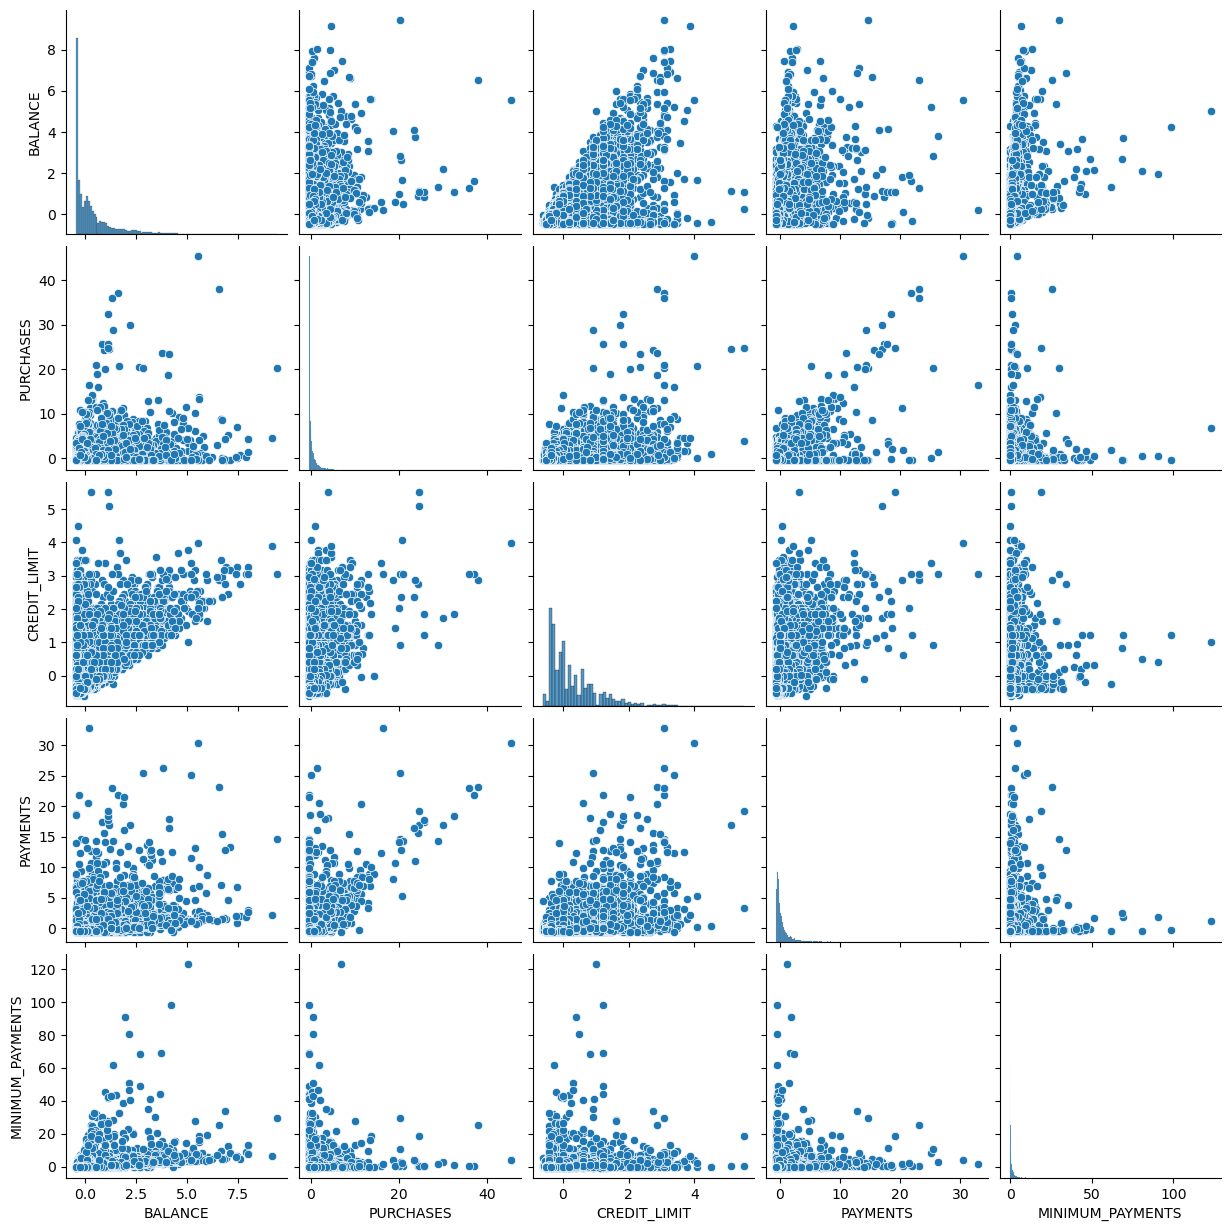

In [ ]:
columns_to_plot = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
sns.pairplot(df[columns_to_plot])
plt.show()

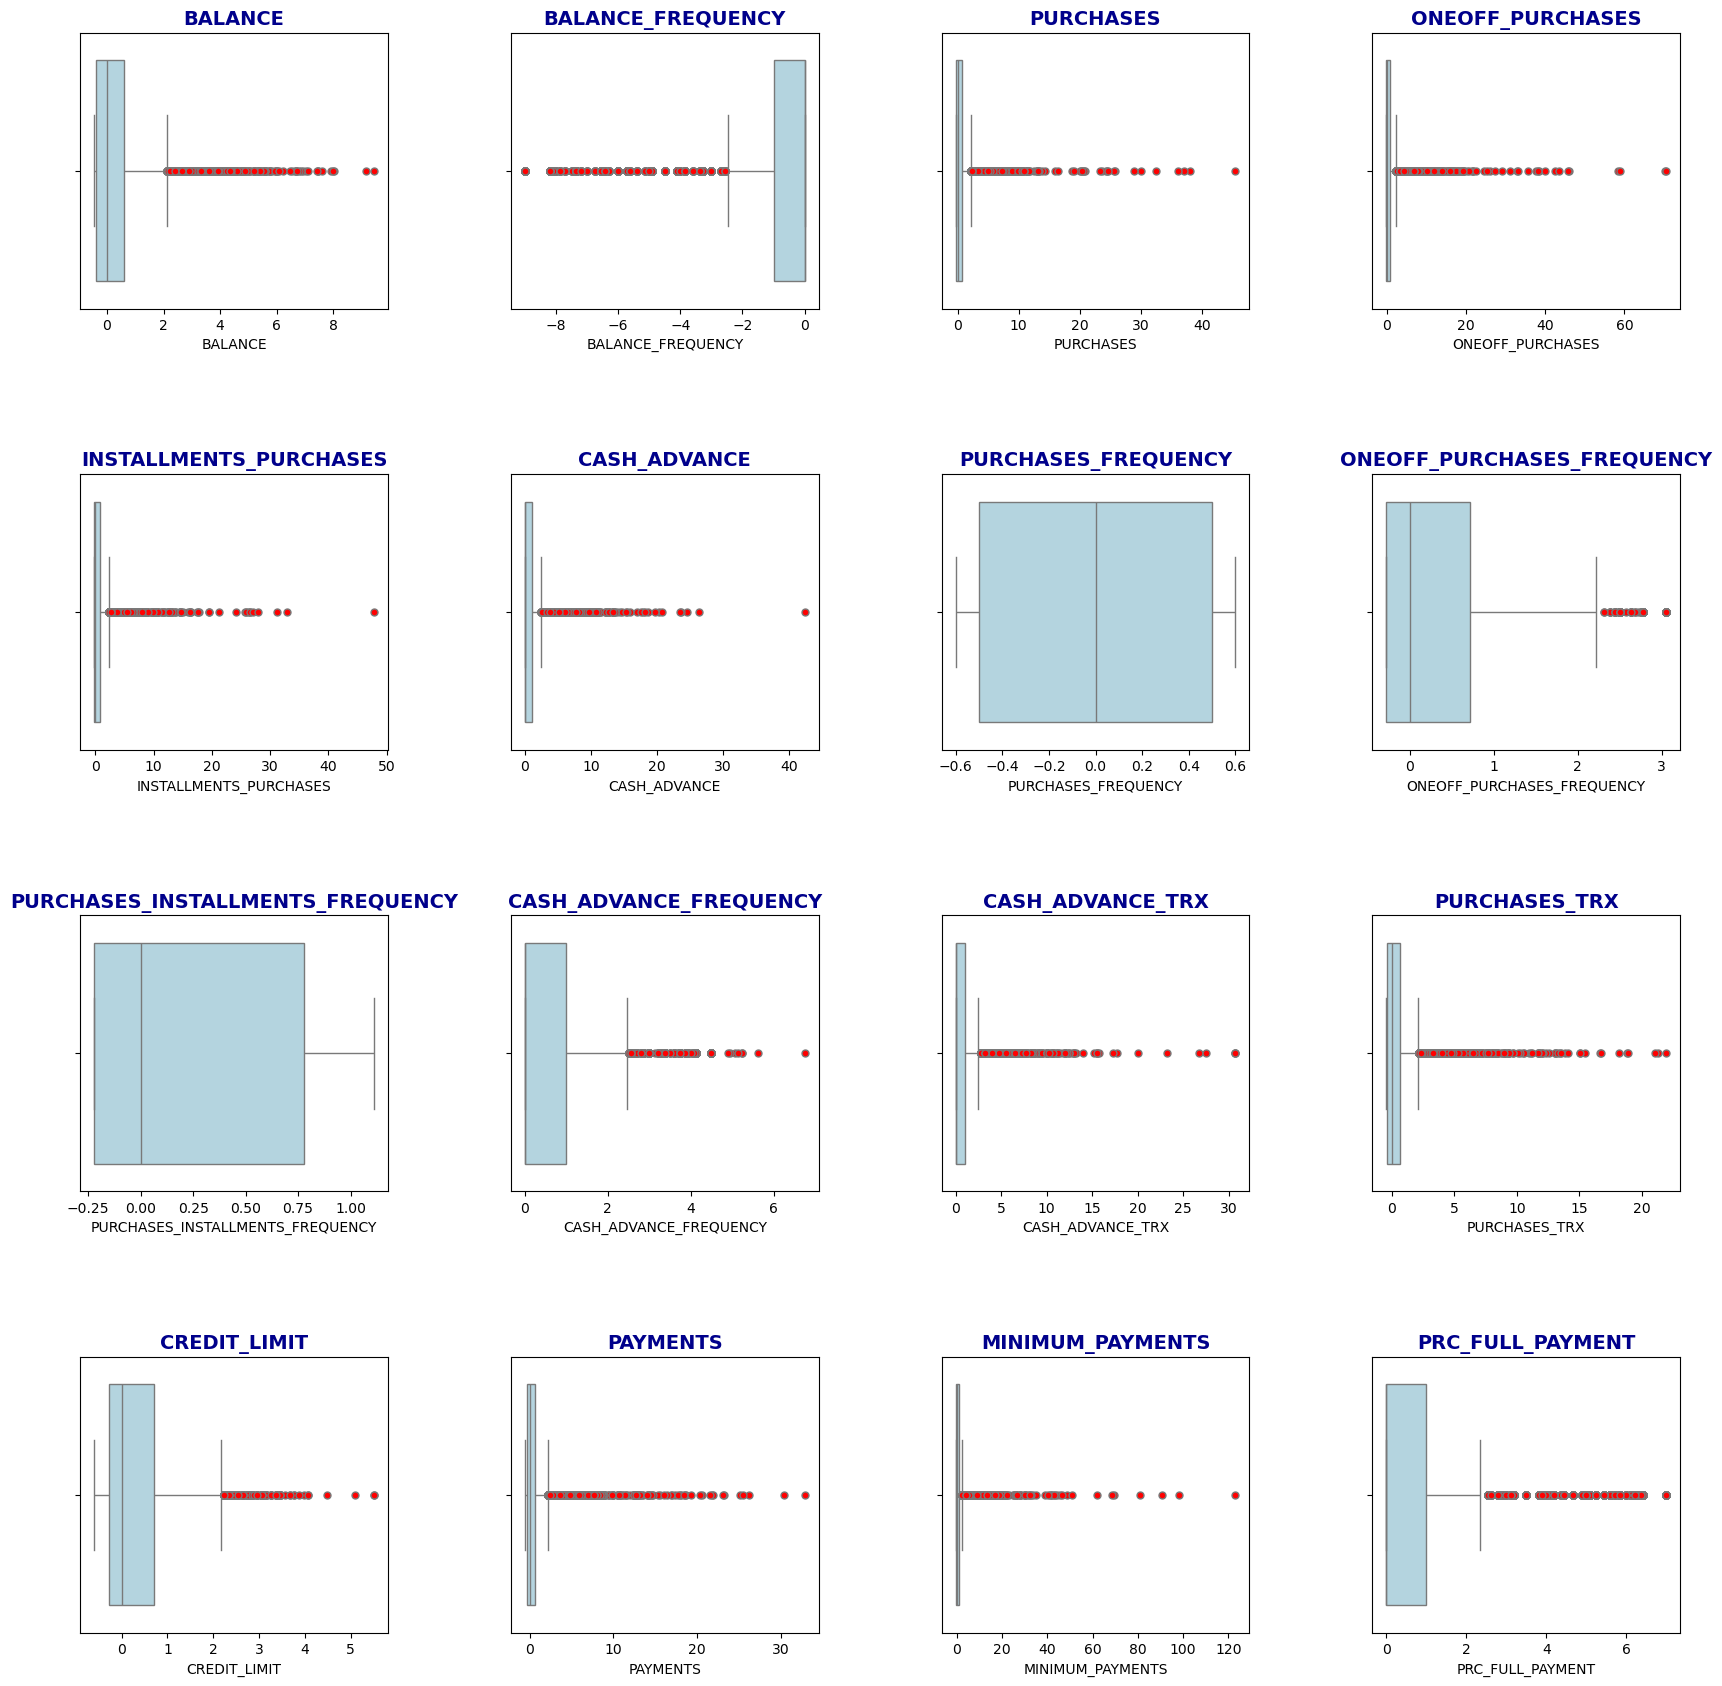

In [ ]:
plt.figure(figsize=(20, 20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.6)

numeric_cols = df.select_dtypes(include=['number']).columns

numeric_cols = numeric_cols[0:]

for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i + 1)

    sns.boxplot(data=df, x=col, color='lightblue',
                flierprops=dict(markerfacecolor='red', markersize=5),
                orient='h')

    plt.title(col, fontsize=14, fontweight='bold', color='darkblue')

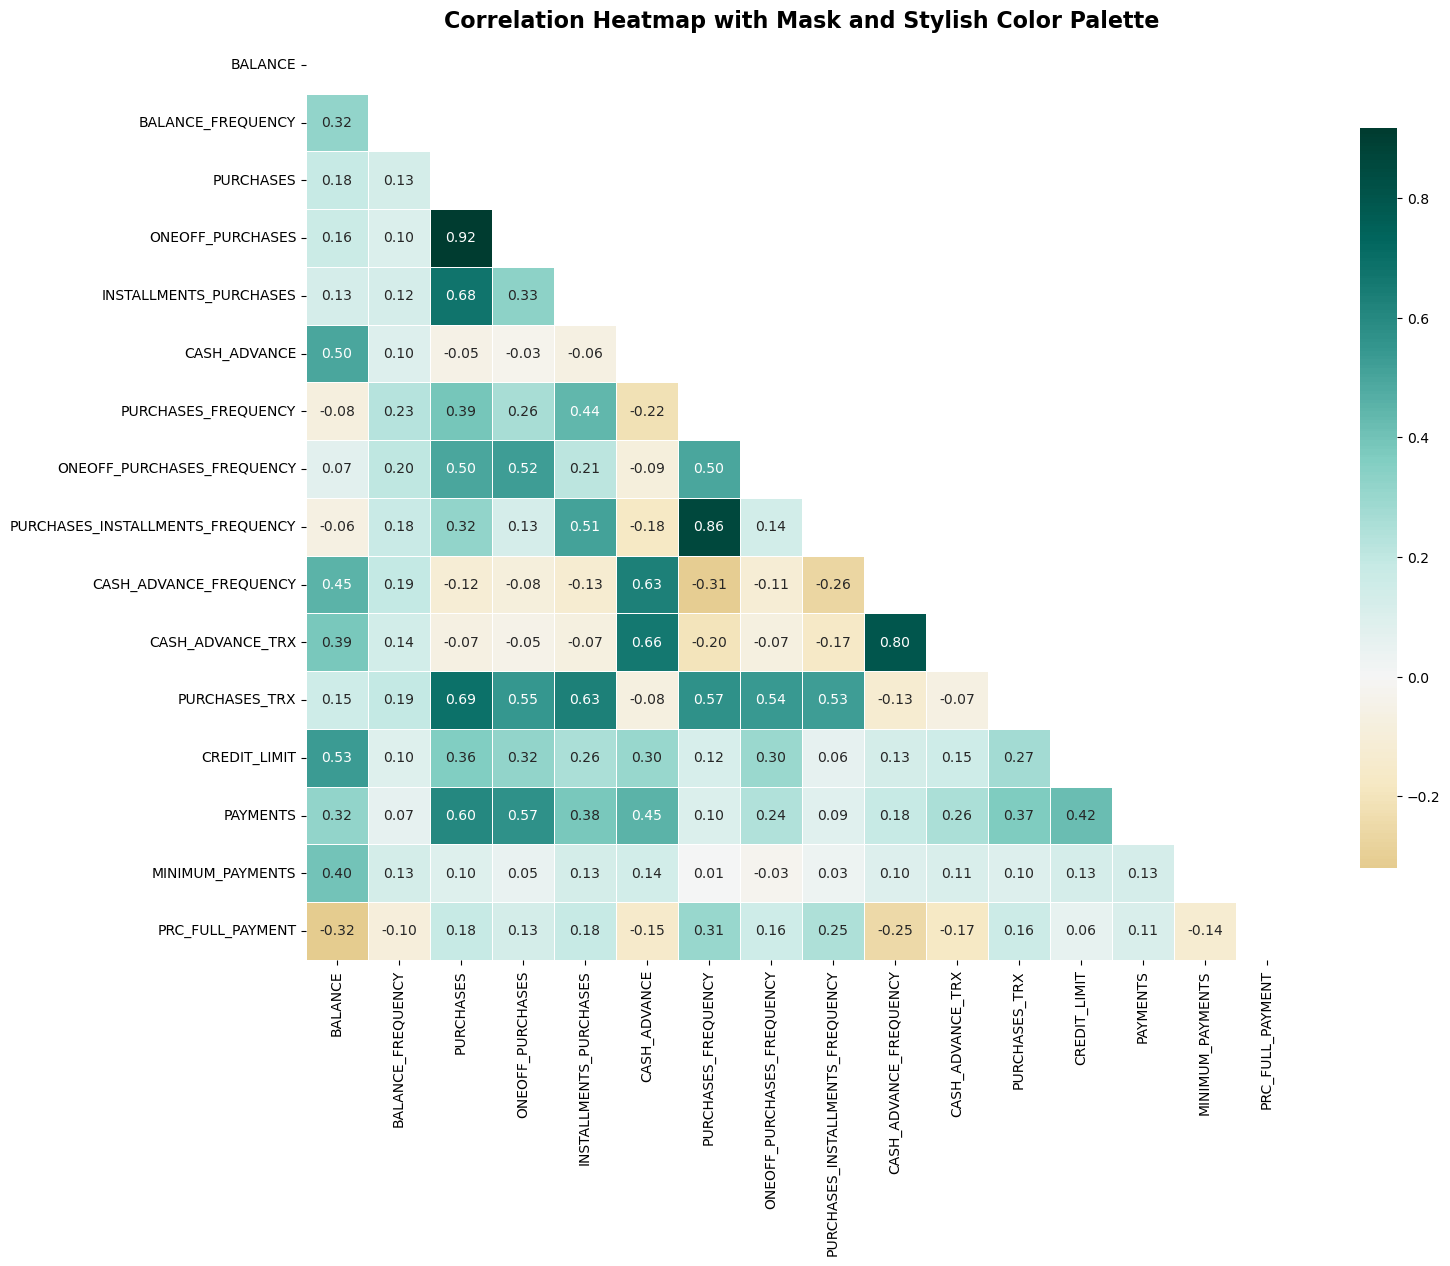

In [ ]:
# Calculate the correlation matrix
corr = df.corr()

# Create a figure for visualization
plt.figure(figsize=(16, 12))

# Apply an upper triangular mask
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a heatmap with customized settings
sns.heatmap(corr, annot=True, mask=mask, cmap='BrBG', fmt=".2f", linewidths=0.5, center=0,
            cbar_kws={'shrink': 0.8})

# Set the title of the chart
plt.title('Correlation Heatmap with Mask and Stylish Color Palette', fontsize=16, fontweight='bold')

# Display the chart
plt.show()

<br>

## 🔴 Model 🤖📌

<br>
<h3>Using SKlearn 🤖📚<h3>

eps=0.2, min_samples=3 → Silhouette: -0.5124, DB Index: 1.4186, CH Index: 2.6308
eps=0.2, min_samples=5 → Silhouette: -0.4810, DB Index: 1.4619, CH Index: 3.5246
eps=0.2, min_samples=10 → Silhouette: -0.3442, DB Index: 1.7850, CH Index: 8.1539
eps=0.3, min_samples=3 → Silhouette: -0.5089, DB Index: 1.4402, CH Index: 3.5828
eps=0.3, min_samples=5 → Silhouette: -0.4748, DB Index: 1.4411, CH Index: 8.1811
eps=0.3, min_samples=10 → Silhouette: -0.4484, DB Index: 1.4929, CH Index: 10.0447
eps=0.4, min_samples=3 → Silhouette: -0.5029, DB Index: 1.3928, CH Index: 5.1285
eps=0.4, min_samples=5 → Silhouette: -0.4566, DB Index: 1.4152, CH Index: 9.5496
eps=0.4, min_samples=10 → Silhouette: -0.3955, DB Index: 1.2866, CH Index: 26.6155
eps=0.5, min_samples=3 → Silhouette: -0.4898, DB Index: 1.4300, CH Index: 7.1183
eps=0.5, min_samples=5 → Silhouette: -0.4257, DB Index: 1.3778, CH Index: 17.3335
eps=0.5, min_samples=10 → Silhouette: -0.4083, DB Index: 1.3399, CH Index: 24.6673


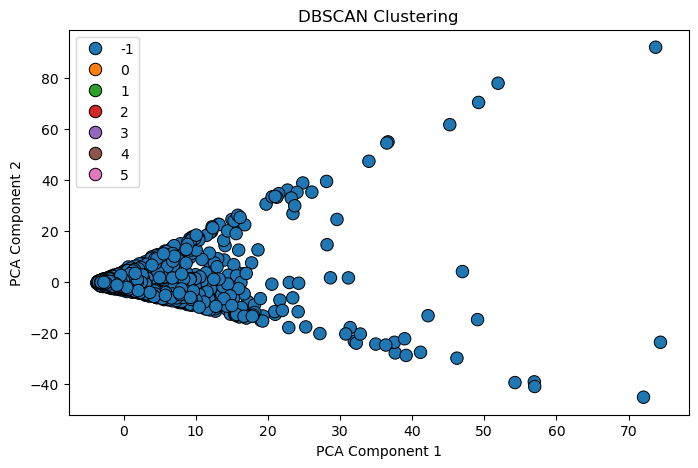

In [ ]:
# Try different eps and min_samples
for eps_val in [0.2, 0.3, 0.4, 0.5]:
    for min_pts in [3, 5, 10]:
        clustering = DBSCAN(eps=eps_val, min_samples=min_pts).fit(df)
        labels = clustering.labels_

        
        if len(set(labels)) > 1:
            silhouette = silhouette_score(df, labels)
            davies_bouldin = davies_bouldin_score(df, labels)
            calinski_harabasz = calinski_harabasz_score(df, labels)
        else:
            silhouette, davies_bouldin, calinski_harabasz = -1, float("inf"), -1
        
        print(f"eps={eps_val}, min_samples={min_pts} → Silhouette: {silhouette:.4f}, DB Index: {davies_bouldin:.4f}, CH Index: {calinski_harabasz:.4f}")


pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)
clustering = DBSCAN(eps=0.1, min_samples=4).fit(df)
labels = clustering.labels_
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="tab10", s=80, edgecolor='k')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Clusters")
plt.title("DBSCAN Clustering")
plt.legend()
plt.show()

<br>

## DBSCAN From Scratch 🤖✏️

In [18]:
class DBSCAN:
    def __init__(self, eps=0.3, min_samples=5):
        self.eps = eps
        self.min_samples = min_samples
        self.labels_ = None

    def fit(self, X):
        n_samples = X.shape[0]
        self.labels_ = np.full(n_samples, -1)  
        cluster_id = 0

        for i in range(n_samples):
            if self.labels_[i] != -1:
                continue  

            neighbors = self._region_query(X, i)

            if len(neighbors) < self.min_samples:
                continue

            self._expand_cluster(X, i, neighbors, cluster_id)
            cluster_id += 1

    def _region_query(self, X, index):
        distances = np.linalg.norm(X - X[index], axis=1)
        return np.where(distances <= self.eps)[0]

    def _expand_cluster(self, X, index, neighbors, cluster_id):
        self.labels_[index] = cluster_id
        i = 0
        while i < len(neighbors):
            point = neighbors[i]

            if self.labels_[point] == -1:  
                self.labels_[point] = cluster_id

            elif self.labels_[point] is not None:  
                i += 1
                continue

            new_neighbors = self._region_query(X, point)
            if len(new_neighbors) >= self.min_samples:
                neighbors = np.append(neighbors, new_neighbors)  
            
            i += 1

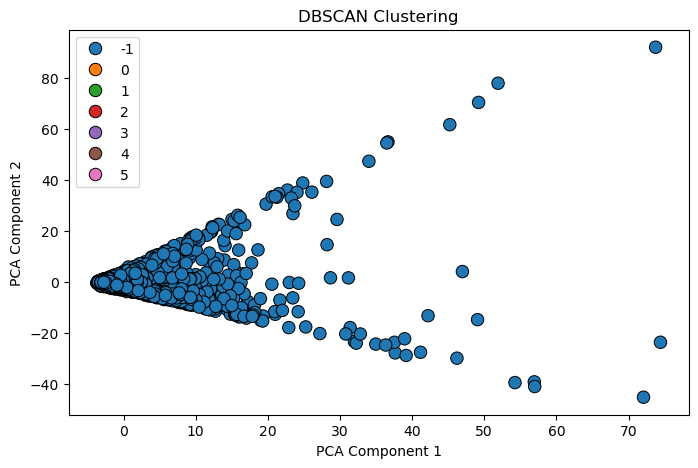

In [21]:
X = df.values

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)
dbscan = DBSCAN(eps=0.1, min_samples=4)
dbscan.fit(X)
labels = dbscan.labels_
silhouette = silhouette_score(df, labels)

print("silhouette = ",silhouette)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="tab10", s=80, edgecolor='k')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Clusters")
plt.title("DBSCAN Clustering")
plt.legend()
plt.show()

<br>
<br>


# **Here are some useful resources for understanding clustering and evaluation algorithms and techniques:**

## **DBSCAN** :

### 📖 **Articles & Tutorials**  
1. **A Guide to the DBSCAN Clustering Algorithm (DataCamp)**  
   🔗 [https://www.datacamp.com/tutorial/dbscan-clustering-algorithm](https://www.datacamp.com/tutorial/dbscan-clustering-algorithm)  

2. **Understanding DBSCAN (Towards Data Science - Medium)**  
   🔗 [https://towardsdatascience.com/dbscan-clustering-explained-97556a2ad556](https://towardsdatascience.com/dbscan-clustering-explained-97556a2ad556)  
 

### 📜 **Official Documentation**  
4. **Scikit-Learn DBSCAN Documentation**  
   🔗 [https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)  

5. **DBSCAN Example in Scikit-Learn**  
   🔗 [https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html)  

### 🎥 **Video Tutorials**  
6. **DBSCAN Algorithm Explained (StatQuest - YouTube)**  
   📺 [https://www.youtube.com/watch?v=RDZUdRSDOok](https://www.youtube.com/watch?v=RDZUdRSDOok)  




<br>

---

<br>

## **Choosing optimal values ​​for eps and min_samples in DBSCAN!**

### 📖 **Articles & Tutorials**  

1. **A Guide on Parameter Selection for DBSCAN (Analytics Vidhya)**  
   🔗 [https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/](https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/)  

2. **Finding Optimal `eps` Using K-Distance Graph (Stack Overflow Discussion)**  
   🔗 [https://stats.stackexchange.com/questions/88872/choosing-epsilon-parameter-for-dbscan](https://stats.stackexchange.com/questions/88872/choosing-epsilon-parameter-for-dbscan)  

---

### 📜 **Official Documentation & Examples**  

5. **DBSCAN Parameter Selection Guide - Scikit-Learn Documentation**  
   🔗 [https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html)  

6. **Using Nearest Neighbors to Determine `eps` (Scikit-Learn Example)**  
   🔗 [https://scikit-learn.org/stable/auto_examples/neighbors/plot_dbscan_parameter_estimation.html](https://scikit-learn.org/stable/auto_examples/neighbors/plot_dbscan_parameter_estimation.html)  

---



<br>

## Resources for Evaluating DBSCAN Performance

### 2. SciKit-Learn Library Documentation
- **Link:** [https://scikit-learn.org/stable/modules/clustering.html#dbscan](https://scikit-learn.org/stable/modules/clustering.html#dbscan)
- The documentation contains information about the **DBSCAN** algorithm and how to use different evaluation metrics such as:
  - **Silhouette Coefficient**
  - **Davies-Bouldin Index**
  - **Calinski-Harabasz Index**

### 3. DBSCAN Clustering in Machine Learning (Analytics Vidhya)
- **Link:** [https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/](https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/)
- This article explains the **DBSCAN** algorithm in detail, focusing on how to evaluate its performance using different metrics.

These resources will help you understand how to evaluate the performance of the **DBSCAN** algorithm using multiple metrics such as **Silhouette Score**, **Davies-Bouldin Index**, and **Calinski-Harabasz Index**.
